In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # For testing and training splits
from sklearn.model_selection import cross_val_score # For cross validation
from sklearn.model_selection import GridSearchCV # For searching over possible values of hyperparameters
from sklearn.svm import SVC

# K-Nearest Neighbours classifiers

Load in the classifier data, classifierX.csv contains the inputs and classifiery.csv contains the outputs or targets.

Numpy has a function called [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) that can be used to read simple files containing numeric values:

```python
X = np.loadtxt("classifierX.csv",delimiter=",")
y = np.loadtxt("classifiery.csv",delimiter=",")
```

In [2]:
X = np.loadtxt("classifierX.csv",delimiter=",")
y = np.loadtxt("classifiery.csv",delimiter=",")

Try using X.shape and y.shape to see the dimensions of the data.

In [18]:
X.shape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Try plotting the data in a scatter plot using the first and second columns of X, coloured in using the class label.

```python
sns.scatterplot(x=...,y=...,hue=...)
```

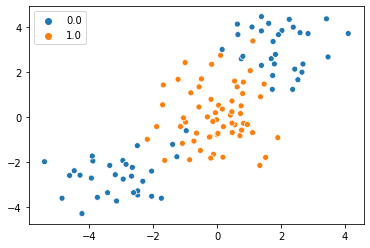

In [19]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )

## Training and test data

For our classifier we want to be able to split the data into a training and test subset, so that we can evaluate the performace on new data where we know the true label.

scikit-learn has a function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that will split the input and output data by rows into training and test sets.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

Try using the shape attribute of X_train and X_test to see how the data have been split.

In [38]:
X_train.shape
X_test.shape

(12, 2)

Use the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html) model to fit the training data, then score using the test data.

In [63]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.6666666666666666

Try this again a few times for different splits (run train_test_split again) and observe the score.

## Cross validation

Running cross validation in scikit-learn is almost automatic -- all we need to do is provide the model and full data set to the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) function.

```python
cross_val_score(model,X,y,cv=10)
```

In [52]:
cross_val_score(KNN,X_train,y_train,cv=10)

array([0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ,
       0.9       , 1.        , 1.        , 1.        , 0.8       ])

We can visualise the scores using a boxplot (usually this would be used for comparing multiple different models). 

```python
plt.ylim(0,1)
sns.boxplot(y=cross_val_score(model,X,y,cv=10))
```

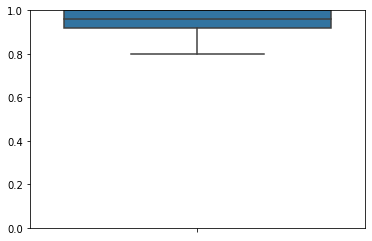

In [53]:
plt.ylim(0,1)
sns.boxplot(y=cross_val_score(KNN,X_train,y_train,cv=10))

Try running this for multiple different values of n_neighbors in the K-NN model.

## Hyperparameter search

Rather than trying all different numbers of neighbours, we can again use scikit-learn to automate the process.

The [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function will take a model and build a new model that tries many different hyperparameter settings for the model, and selects the best.

The ranges of possible values to be considered is specified using a Python dictionary, with an entry for each parameter of the model we want to search, giving the range of values we want to cover.

```python
grid = {"C":range(1,10)}

model_cv = GridSearchCV(model,grid,cv=10,iid=False)
model_cv.fit(X,y)
model_cv.best_params_
```

Try this for the K-NN model, searching over the n_neighbors parameter in a sensible range to find the best value.

In [57]:
grid = {"n_neighbors":range(1,30)}

model_cv = GridSearchCV(KNN,grid,cv=10,iid=False)
model_cv.fit(X_train,y_train)
model_cv.best_params_

{'n_neighbors': 6}

We can plot the mean test score for each value of the input using

```python
plt.plot(range(....),model_cv.cv_results_["mean_test_score"])
```

where range(....) should be filled in with the range you have used.

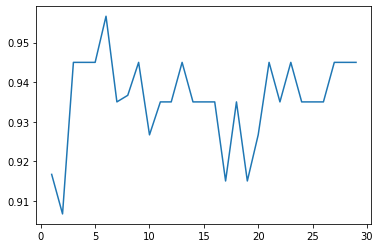

In [64]:
plt.plot(range(1,30), model_cv.cv_results_["mean_test_score"])

## Visualising the boundaries

The helper function below will plot the boundaries for the class decision of the K-NN classifier for the data, given a trained model and the data.

In [67]:
def plot_boundariesKNN(model,X,y):
    plt.figure(figsize=(9,9))
    x_min = np.min(X[:,0])-0.25
    y_min = np.min(X[:,1])-0.25
    x_max = np.max(X[:,0])+0.25
    y_max = np.max(X[:,1])+0.25

    step = 0.1
    x_grid = np.arange(x_min,x_max,step)
    y_grid = np.arange(y_min,y_max,step)

    C = np.zeros((len(y_grid),len(x_grid)))

    for i,xx in enumerate(x_grid):
        for j,yy in enumerate(y_grid):
            C[j,i] = model.predict(np.array([[xx,yy]]))

    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
    plt.imshow(C,interpolation='nearest',extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),origin='lower')

Use plot_boundariesKNN with a trained KNN classifier (and the training data) with different numbers of neighbours to see how the boundaries change. Examples to try are using $K=1$, $K=2$, and $K=10$.

If you used a very large range you should also see a sudden drop in the score in the plot from the GridSearchCV above. Try to see what happens around this value of $K$ that causes it to drop.

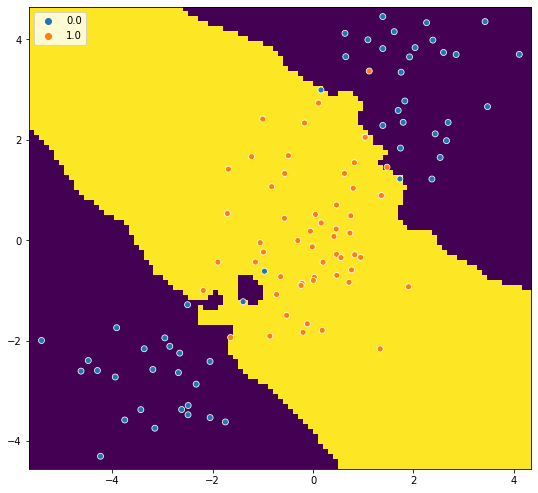

In [68]:
plot_boundariesKNN(KNN,X_train,y_train)

# SVM classifiers

The helper function below will plot the boundaries and marhin for the class decision of the SVM classifier for the data, given a trained model and the data.

In [69]:
def plot_boundariesSVM(model,X,y):
    plt.figure(figsize=(9,9))
    x_min = np.min(X[:,0])-0.25
    y_min = np.min(X[:,1])-0.25
    x_max = np.max(X[:,0])+0.25
    y_max = np.max(X[:,1])+0.25

    step = 0.1
    x_grid = np.arange(x_min,x_max,step)
    y_grid = np.arange(y_min,y_max,step)

    C = np.zeros((len(y_grid),len(x_grid)))
    B = np.zeros((len(y_grid),len(x_grid)))
    for i,xx in enumerate(x_grid):
        for j,yy in enumerate(y_grid):
            v = model.decision_function(np.array([[xx,yy]]))
            B[j,i] = v
            C[j,i] = model.predict(np.array([[xx,yy]]))
            #if v<-1.0:
            #    C[j,i] = -1
            #elif v>1.0:
            #    C[j,i] = 1
            #else:
            #    C[j,i] = 0
            #C[j,i] = model.predict(np.array([[xx,yy]]))

    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,s=100.0)
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],marker="+",color="black",alpha=0.5)
    plt.imshow(C,interpolation='bilinear',extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),origin='lower')
    plt.contour(B,levels=[0.0],colors="red",extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),origin='lower')
    plt.contour(B,levels=[-1.0,1.0],colors="green",linestyles="dashed",extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),origin='lower')

## Support vectors and decision boundaries

In scikit-learn, the SVC model implements a support vector machine. Try creating an SVC model, passing the options kernel="linear" and kernel="rbf", and using plot_boundariesSVM, to see how the boundary changes.

In [79]:
SVM = SVC(gamma = 'auto')
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

0.8333333333333334

The SVM model has a hyperparameter C that determines how many points are allowed to cross the margin. For the rbf kernel, try to determine the optimum value of C, generate a plot showing how the score changes as C changes, and generate a plot of the boundary for the optimum value of C using plot_boundariesSVM.

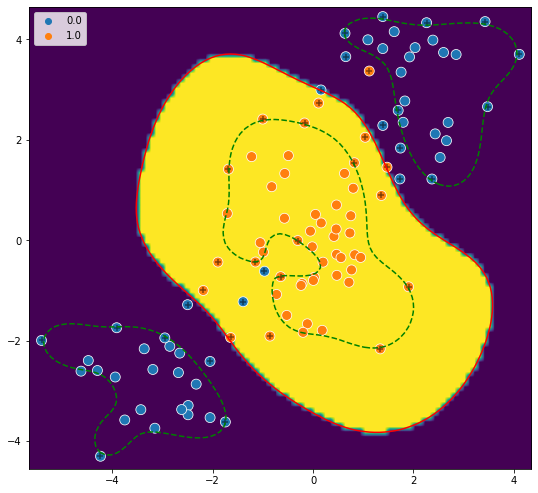

In [80]:
plot_boundariesSVM(SVM,X_train,y_train)

Try some extreme values of C e.g. 0.05 and 10000. See how this changes the number of support vectors and the shape of the boundaries.

# K-NN Optional extra

See if you can fill out the functio below to implement a 1-NN classifier on the data above, and modify the plot_boundariesKNN function to use it.

In [ ]:
def oneNN(X_train,y_train,x): # X_train and y_train are the training data, x is the point to classify.
    N = X.shape[0] # Number of data points
    min_distance = np.Inf # Current smallest distance encountered
    for i in range(N):
        # for each data point X_train[i,:] and class label y_train[i]...